In [1]:
import pandas as pd
import numpy as np

import matplotlib.style as style
style.use('seaborn-whitegrid')

import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
import keras
from keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.applications import VGG16
from keras.optimizers import SGD
from keras.preprocessing import image as image_utils
from keras.utils import to_categorical
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import Augmentor

import warnings
warnings.filterwarnings(action='ignore')

Using TensorFlow backend.


In [3]:
gestures = {'L_': 'L',
           'fi': 'Fist',
           'C_': 'C',
           'ok': 'Okay',
           'pe': 'Peace',
           'pa': 'Palm'
            }

gestures_map = {'Fist' : 0,
                'L': 1,
                'Okay': 2,
                'Palm': 3,
                'Peace': 4
                }

#### Drawing data

In [72]:
X_data = []
y_data = []
image_path = []
gesture = []
image_rgb = []

directory = os.fsencode('/home/ubuntu/project_kojak/frames/drawings/drawings/')

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".jpg") and (not filename.startswith("drawing_C_")): 
        path = os.path.join('/home/ubuntu/project_kojak/frames/drawings/drawings/', filename)
        gesture_name = gestures[filename[8:10]]
        
        gesture.append(gesture_name)
        y_data.append(gestures_map[gesture_name])
        image_path.append(path)

        
        img = Image.open(path).convert('L')
        img = img.resize((224, 224))
        arr = np.array(img)
        X_data.append(arr)
        
#         img2rgb = image_utils.load_img(path=path, target_size=(224, 224))
#         img2rgb = image_utils.img_to_array(img2rgb)
#         image_rgb.append(img2rgb)

        img2rgb = Image.open(path)
        img2rgb = img2rgb.resize((224, 224))
        img2rgb = np.array(img2rgb)
        image_rgb.append(img2rgb)

        


#         y_values = np.full((count, 1), lookup[j]) 
#         y_data.append(y_values)

    else:
        continue
        
image_rgb = np.array(image_rgb, dtype = 'float32')
# x_data = np.array(x_data, dtype=np.uint8)
image_rgb = image_rgb.reshape((len(image_rgb), 224, 224, 3))
image_rgb /= 255

y_data = np.array(y_data)
y_data = to_categorical(y_data)

### Sign Language Data

In [ ]:
X_data = []
y_data = []
image_path = []
letters = []
image_rgb = []

count = 0

directory = os.fsencode('/home/ubuntu/asl_alphabet')
file_list = []

for folder in os.listdir('/home/ubuntu/asl_alphabet'):
    if not folder.startswith('.'):
        for filename in os.listdir('/home/ubuntu/asl_alphabet/' + str(folder)):
            path = '/home/ubuntu/asl_alphabet/' + str(folder) + filename
            count +=1
            if count == 10:
                break
            
                


    
#     filename = os.fsdecode(file)
#     if filename.endswith(".jpg") and (not filename.startswith("drawing_C_")): 
#         path = os.path.join('/home/ubuntu/project_kojak/frames/drawings/drawings/', filename)
#         gesture_name = gestures[filename[8:10]]
        
#         gesture.append(gesture_name)
#         y_data.append(gestures_map[gesture_name])
#         image_path.append(path)

        
#         img = Image.open(path).convert('L')
#         img = img.resize((224, 224))
#         arr = np.array(img)
#         X_data.append(arr)
        
# #         img2rgb = image_utils.load_img(path=path, target_size=(224, 224))
# #         img2rgb = image_utils.img_to_array(img2rgb)
# #         image_rgb.append(img2rgb)

#         img2rgb = Image.open(path)
#         img2rgb = img2rgb.resize((224, 224))
#         img2rgb = np.array(img2rgb)
#         image_rgb.append(img2rgb)

        


# #         y_values = np.full((count, 1), lookup[j]) 
# #         y_data.append(y_values)

#     else:
#         continue
        
# image_rgb = np.array(image_rgb, dtype = 'float32')
# # x_data = np.array(x_data, dtype=np.uint8)
# image_rgb = image_rgb.reshape((len(image_rgb), 224, 224, 3))
# image_rgb /= 255

# y_data = np.array(y_data)
# y_data = to_categorical(y_data)

In [24]:
len(letters)

41

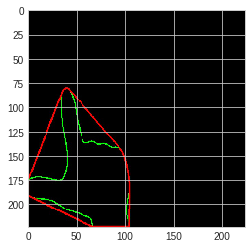

In [86]:
import matplotlib.pyplot as plt
plt.imshow(img2rgb)

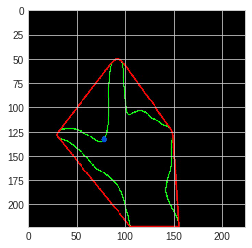

In [100]:
plt.imshow(image_rgb[330])

#### Silhouettes data

In [36]:
X_data = []
y_data = []
image_path = []
gesture = []
image_rgb = []

directory = os.fsencode('/home/ubuntu/project_kojak/frames/silhouettes/')

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".jpg") and (not filename.startswith("C_")): 
        path = os.path.join('/home/ubuntu/project_kojak/frames/silhouettes/', filename)
        gesture_name = gestures[filename[0:2]]
        
        gesture.append(gesture_name)
        y_data.append(gestures_map[gesture_name])
        image_path.append(path)

        
        img = Image.open(path).convert('L')
        img = img.resize((224, 224))
        arr = np.array(img)
        X_data.append(arr)
        
        img2rgb = image_utils.load_img(path=path, target_size=(224, 224))
        img2rgb = image_utils.img_to_array(img2rgb)
        image_rgb.append(img2rgb)

        


#         y_values = np.full((count, 1), lookup[j]) 
#         y_data.append(y_values)

    else:
        continue
        
image_rgb = np.array(image_rgb, dtype = 'float32')
# x_data = np.array(x_data, dtype=np.uint8)
image_rgb = image_rgb.reshape((len(image_rgb), 224, 224, 3))
image_rgb /= 255

y_data = np.array(y_data)
y_data = to_categorical(y_data)

In [74]:
def process_data(x_data, y_data):
    x_data = np.array(x_data, dtype = 'float32')
    # x_data = np.array(x_data, dtype=np.uint8)
    x_data = x_data.reshape((len(x_data), 224, 224, 1))
    x_data /= 255
    
    y_data = np.array(y_data)
    y_data = y_data.reshape(len(x_data), 1)
    y_data = to_categorical(y_data)
    return x_data, y_data

def process_data_rgb(x_data, y_data):
    x_data = np.array(x_data, dtype = 'float32')
    # x_data = np.array(x_data, dtype=np.uint8)
    x_data = x_data.reshape((len(x_data), 224, 224, 3))
    x_data /= 255
    
    y_data = np.array(y_data)
    y_data = to_categorical(y_data)
    return x_data, y_data

In [40]:
# Send the dictionaries to a dataframe to be saved for future use
# d = {'image_path':image_path, 'gesture':gesture, 'image_rgb': image_rgb, 'image_bw_x': X_data, 'image_bw_y': y_data}
d = {'image_path':image_path, 'gesture':gesture}
df = pd.DataFrame(d)
# df['gesture_num'] = df['gesture'].apply(lambda x: x[1:2])
# df['gesture_name'] = df['gesture'].apply(lambda x: x[3:])

# df.to_csv('silhouette_df.csv')
# df = pd.read_csv('silhouette_df.csv')

In [120]:
df['y'] = df['gesture'].map(gestures_map)

In [121]:
df['y'].value_counts()

4    234
2    214
1    214
5    170
3    139
Name: y, dtype: int64

In [23]:
# X_data, y_data = process_data(X_data, y_data)
# image_rgb, y_data = process_data_rgb(image_rgb, y_data)

#### Train-test split

In [78]:
X_train_rgb, X_test_rgb, y_train_rgb, y_test_rgb = train_test_split(image_rgb, y_data, test_size = 0.2, random_state=12, stratify=y_data)

#### Build the VGG Model

In [137]:
# load VGG16
#Get back the convolutional part of a VGG network trained on ImageNet
import keras
from keras import models, layers, optimizers
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.models import Model
imageSize=224
model1 = VGG16(weights='imagenet', include_top=False, input_shape=(imageSize, imageSize, 3))
optimizer1 = optimizers.Adam()

# datagen = ImageDataGenerator(
# featurewise_center=True,
# featurewise_std_normalization=True,
# rotation_range=45.,
# width_shift_range=0.2,
# height_shift_range=0.2,
# horizontal_flip=True)

base_model = model1 # Topless
# Add top layer
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
x = Dense(128, activation='relu', name='fc3')(x)
x = Dense(64, activation='relu', name='fc4')(x)
#### Playing with other architectures
#     x = Flatten() (x)
#     x = Dense(64) (x)
#     x = Activation('relu') (x)
#     x = Dropout(0.5) (x)
#     x = Dense(32) (x)
#     x = Activation('relu') (x)
#     x = Dropout(0.5) (x)
####
predictions = Dense(5, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Train top layer
for layer in base_model.layers:
    layer.trainable = False

# model.compile(loss='categorical_crossentropy', 
#       optimizer=optimizers.Adam(), 
#       metrics=['accuracy'])
# callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]

# datagen.fit(X_train_rgb)

# # Fit model
# model.fit_generator(datagen.flow(X_train_rgb, y_train_rgb, batch_size=64),
#                 steps_per_epoch=len(X_train_rgb) / 64, epochs=8, validation_data=(X_test_rgb, y_test_rgb))
# #class_weight=classweight,

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=15.,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train_rgb)

# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_train_rgb, y_train_rgb, batch_size=32),
                    steps_per_epoch=len(X_train_rgb)/32, epochs=150, validation_data=(X_test_rgb, y_test_rgb))

Epoch 1/150
22/21 [===============================] - 15s 667ms/step - loss: 1.4742 - acc: 0.3888 - val_loss: 1.3467 - val_acc: 0.4692
Epoch 2/150
22/21 [===============================] - 14s 629ms/step - loss: 0.8989 - acc: 0.6489 - val_loss: 1.1522 - val_acc: 0.4418
Epoch 3/150
22/21 [===============================] - 14s 633ms/step - loss: 0.6596 - acc: 0.7500 - val_loss: 1.0727 - val_acc: 0.4623
Epoch 4/150
22/21 [===============================] - 14s 635ms/step - loss: 0.5180 - acc: 0.8305 - val_loss: 0.8008 - val_acc: 0.6986
Epoch 5/150
22/21 [===============================] - 14s 635ms/step - loss: 0.4114 - acc: 0.8424 - val_loss: 0.7803 - val_acc: 0.6712
Epoch 6/150
22/21 [===============================] - 14s 635ms/step - loss: 0.3268 - acc: 0.8846 - val_loss: 0.6239 - val_acc: 0.8185
Epoch 7/150
22/21 [===============================] - 14s 634ms/step - loss: 0.3599 - acc: 0.8813 - val_loss: 0.7074 - val_acc: 0.7158
Epoch 8/150
22/21 [===============================] - 1

#### Save and import model

In [88]:
# model.save('silhouette_VGG.h5')

from keras.models import load_model
model = load_model('/home/ubuntu/project_kojak/silhouette_VGG.h5')

In [ ]:
X_test_rgb[0].shape

In [92]:
model.predict(X_test_rgb)

array([[2.5975669e-03, 6.8540269e-01, 8.0532441e-03, 4.6215006e-03,
        2.7723959e-01, 2.2085395e-02],
       [1.8037352e-04, 9.8982668e-01, 2.2430022e-04, 8.4401938e-05,
        9.5383069e-03, 1.4591584e-04],
       [2.7303877e-05, 6.1461215e-05, 4.7820024e-04, 7.3979894e-04,
        4.0442785e-04, 9.9828881e-01],
       ...,
       [1.7109163e-04, 3.7865416e-04, 2.1471193e-03, 2.1336788e-02,
        1.3310532e-02, 9.6265584e-01],
       [4.4995941e-05, 1.9672023e-02, 3.9480557e-04, 1.5412706e-04,
        9.7355169e-01, 6.1823567e-03],
       [2.1220765e-05, 2.9467508e-05, 9.6603344e-06, 9.9880779e-01,
        1.1285117e-03, 3.3434828e-06]], dtype=float32)

In [138]:
pred = model.predict(X_test_rgb)
pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test_rgb, axis=1)

In [139]:
print(confusion_matrix(y_true, pred))
print('\n')
print(classification_report(y_true, pred))

[[53  3  0  0  0]
 [ 0 77  0  0  0]
 [ 1 33  2  0  0]
 [33  5 13 12  0]
 [ 0 57  0  0  3]]


             precision    recall  f1-score   support

          0       0.61      0.95      0.74        56
          1       0.44      1.00      0.61        77
          2       0.13      0.06      0.08        36
          3       1.00      0.19      0.32        63
          4       1.00      0.05      0.10        60

avg / total       0.67      0.50      0.40       292



In [50]:
y_test_rgb

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [55]:
pred = np.argmax(model.predict(X_test_rgb), axis=1)

In [63]:
gesture_names = {0: 'C',
                 1: 'Fist',
                 2: 'L',
                 3: 'Okay',
                 4: 'Palm',
                 5: 'Peace'}

def predict_rgb_image_vgg(path):
    img2rgb = image_utils.load_img(path=path, target_size=(224, 224))
    img2rgb = image_utils.img_to_array(img2rgb)
#     image_rgb.append(img2rgb)
    img2rgb = img2rgb.reshape(1, 224, 224, 3)
    return gesture_names[np.argmax(model.predict(img2rgb))]

In [ ]:
predict_rgb_image_vgg('images_to_predict/test - palm.jpg')

#### Image Augmentation

In [104]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=45.,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train_rgb)

# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_train_rgb, y_train_rgb, batch_size=32),
                    steps_per_epoch=len(X_train_rgb) / 128, epochs=10, validation_data=(X_test_rgb, y_test_rgb))

Epoch 1/10
8/7 [================================] - 11s 1s/step - loss: 1.6103 - acc: 0.5610 - val_loss: 1.5952 - val_acc: 0.3856
Epoch 2/10
8/7 [================================] - 9s 1s/step - loss: 0.8910 - acc: 0.6878 - val_loss: 1.5901 - val_acc: 0.4364
Epoch 3/10
8/7 [================================] - 10s 1s/step - loss: 0.6128 - acc: 0.7967 - val_loss: 1.5757 - val_acc: 0.4492
Epoch 4/10
8/7 [================================] - 10s 1s/step - loss: 0.5136 - acc: 0.8229 - val_loss: 1.1850 - val_acc: 0.5508
Epoch 5/10
8/7 [================================] - 10s 1s/step - loss: 0.4274 - acc: 0.8570 - val_loss: 1.3173 - val_acc: 0.5424
Epoch 6/10
8/7 [================================] - 10s 1s/step - loss: 0.3949 - acc: 0.8673 - val_loss: 1.0941 - val_acc: 0.6017
Epoch 7/10
8/7 [================================] - 10s 1s/step - loss: 0.3201 - acc: 0.9048 - val_loss: 0.9776 - val_acc: 0.6483
Epoch 8/10
8/7 [================================] - 10s 1s/step - loss: 0.3264 - acc: 0.890

In [80]:
model.save('models/new_new_new.h5')

In [109]:
np.argmax(model.predict(X_test_rgb[0].reshape(1,224,224,3)))

4

#### Build own model

In [15]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.25, seed=21))
model.add(layers.Dense(5, activation='softmax'))

In [16]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train[:500], y_train[:500], epochs=4, batch_size=64, validation_data=(X_test[:500], y_test[:500]), verbose=1, callbacks = [MetricsCheckpoint('logs')])

In [79]:
model.fit(X_train_rgb, y_train_rgb, epochs=200, batch_size=128, validation_data=(X_test_rgb, y_test_rgb), verbose=1, callbacks =[early_stopping, model_checkpoint])

Train on 873 samples, validate on 219 samples
Epoch 1/200
873/873 [==============================] - 1s 889us/step - loss: 0.3105 - acc: 0.9278 - val_loss: 0.2031 - val_acc: 0.9589
Epoch 2/200
873/873 [==============================] - 0s 525us/step - loss: 0.0788 - acc: 0.9840 - val_loss: 0.1640 - val_acc: 0.9680
Epoch 3/200
873/873 [==============================] - 0s 553us/step - loss: 0.0224 - acc: 0.9966 - val_loss: 0.1742 - val_acc: 0.9543
Epoch 4/200
873/873 [==============================] - 0s 526us/step - loss: 0.0208 - acc: 0.9954 - val_loss: 0.1776 - val_acc: 0.9543
Epoch 5/200
873/873 [==============================] - 0s 547us/step - loss: 0.0116 - acc: 1.0000 - val_loss: 0.1709 - val_acc: 0.9543
Epoch 6/200
873/873 [==============================] - 0s 527us/step - loss: 0.0074 - acc: 1.0000 - val_loss: 0.1670 - val_acc: 0.9589
Epoch 7/200
873/873 [==============================] - 0s 549us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.1675 - val_acc: 0.9635
Epoch 8/2

In [9]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
#     shear_range=0.3,
)

In [10]:
datagen.fit(X_train_rgb)

In [11]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

file_path = 'models/saved_model.hdf5'
model_checkpoint = ModelCheckpoint(filepath=file_path, save_best_only=True)

early_stopping = EarlyStopping(monitor='val_acc', 
                               min_delta=0, 
                               patience=10, ## changed from 10 to 3 and train/val split is now 10% 
                               verbose=1, 
                               mode='auto', 
                               restore_best_weights=True)

In [ ]:
# fits the model on batches with real-time data augmentation:

model.fit_generator(datagen.flow(X_train_rgb, y_train_rgb, batch_size=64),
                    steps_per_epoch=len(X_train_rgb) / 64,
                    epochs=200,
                    validation_data=(X_test_rgb, y_test_rgb),
                    callbacks=[early_stopping])

In [ ]:
model.save('models/200_epochs_own_model.h5')

In [51]:
model.save('models/silhouette_model.h5')

In [99]:
def get_classification_reports(y_pred, y_true):
    Y_pred_classes = np.array(np.argmax(y_pred))  # reconverts back from one hot encoded 
    Y_true = np.array(np.argmax(y_true))  # reconverts back from one hot encoded
    print(confusion_matrix(Y_true, Y_pred_classes))
    print(classification_report(Y_true, Y_pred_classes))

In [52]:
y_pred = model.predict(X_test_rgb)

In [53]:
y_pred.shape

(383, 5)

In [54]:
Y_pred_classes = np.argmax(y_pred,axis = 1)  # reconverts back from one hot encoded 

In [55]:
Y_true = np.argmax(y_test_rgb,axis = 1)

In [56]:
print(classification_report(Y_pred_classes, Y_true))

             precision    recall  f1-score   support

          0       0.92      0.87      0.90        70
          1       0.88      0.82      0.85        61
          2       0.78      0.90      0.83        58
          3       0.86      0.89      0.87        73
          4       0.93      0.90      0.92       121

avg / total       0.88      0.88      0.88       383



In [57]:
print(confusion_matrix(Y_pred_classes, Y_true))

[[ 61   2   2   4   1]
 [  1  50   7   2   1]
 [  0   3  52   1   2]
 [  3   0   1  65   4]
 [  1   2   5   4 109]]


In [105]:
y_test_rgb.shape

(195, 6)